In [95]:
import pandas as pd

In [96]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [97]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [98]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [99]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [100]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x : (x-x.min())/(x.max()-x.min()))

In [101]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [102]:
import tensorflow as tf

In [103]:
tf.reset_default_graph()

In [104]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [105]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [106]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])

In [107]:
assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

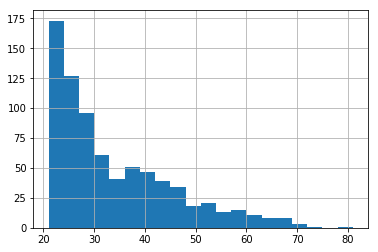

In [109]:
diabetes['Age'].hist(bins=20)

In [110]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [111]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

# Train Test split

In [112]:
x_data = diabetes.drop('Class', axis=1)

In [113]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [114]:
labels = diabetes['Class']

In [115]:
#labels

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [118]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [119]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': '/var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmpe5ijdu26', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x118e31e10>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmpe5ijdu26', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x118e31e10>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [120]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 1 into /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmpe5ijdu26/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1 into /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmpe5ijdu26/model.ckpt.


INFO:tensorflow:loss = 6.931472, step = 1


INFO:tensorflow:loss = 6.931472, step = 1


INFO:tensorflow:global_step/sec: 236.907


INFO:tensorflow:global_step/sec: 236.907


INFO:tensorflow:loss = 7.1923504, step = 101 (0.424 sec)


INFO:tensorflow:loss = 7.1923504, step = 101 (0.424 sec)


INFO:tensorflow:global_step/sec: 502.965


INFO:tensorflow:global_step/sec: 502.965


INFO:tensorflow:loss = 5.1309505, step = 201 (0.197 sec)


INFO:tensorflow:loss = 5.1309505, step = 201 (0.197 sec)


INFO:tensorflow:global_step/sec: 489.711


INFO:tensorflow:global_step/sec: 489.711


INFO:tensorflow:loss = 6.2315383, step = 301 (0.204 sec)


INFO:tensorflow:loss = 6.2315383, step = 301 (0.204 sec)


INFO:tensorflow:global_step/sec: 510.345


INFO:tensorflow:global_step/sec: 510.345


INFO:tensorflow:loss = 3.716772, step = 401 (0.199 sec)


INFO:tensorflow:loss = 3.716772, step = 401 (0.199 sec)


INFO:tensorflow:global_step/sec: 543.159


INFO:tensorflow:global_step/sec: 543.159


INFO:tensorflow:loss = 3.6886742, step = 501 (0.185 sec)


INFO:tensorflow:loss = 3.6886742, step = 501 (0.185 sec)


INFO:tensorflow:global_step/sec: 532.559


INFO:tensorflow:global_step/sec: 532.559


INFO:tensorflow:loss = 4.359564, step = 601 (0.188 sec)


INFO:tensorflow:loss = 4.359564, step = 601 (0.188 sec)


INFO:tensorflow:global_step/sec: 521.328


INFO:tensorflow:global_step/sec: 521.328


INFO:tensorflow:loss = 5.6837926, step = 701 (0.190 sec)


INFO:tensorflow:loss = 5.6837926, step = 701 (0.190 sec)


INFO:tensorflow:global_step/sec: 505.691


INFO:tensorflow:global_step/sec: 505.691


INFO:tensorflow:loss = 7.872733, step = 801 (0.201 sec)


INFO:tensorflow:loss = 7.872733, step = 801 (0.201 sec)


INFO:tensorflow:global_step/sec: 470.697


INFO:tensorflow:global_step/sec: 470.697


INFO:tensorflow:loss = 7.1484084, step = 901 (0.210 sec)


INFO:tensorflow:loss = 7.1484084, step = 901 (0.210 sec)


INFO:tensorflow:Saving checkpoints for 1000 into /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmpe5ijdu26/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1000 into /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmpe5ijdu26/model.ckpt.


INFO:tensorflow:Loss for final step: 4.634329.


INFO:tensorflow:Loss for final step: 4.634329.


In [121]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [122]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2018-06-10-07:22:14


INFO:tensorflow:Starting evaluation at 2018-06-10-07:22:14


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmpe5ijdu26/model.ckpt-1000


INFO:tensorflow:Restoring parameters from /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmpe5ijdu26/model.ckpt-1000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2018-06-10-07:22:14


INFO:tensorflow:Finished evaluation at 2018-06-10-07:22:14


INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.801358, auc_precision_recall = 0.6486993, average_loss = 0.52522594, global_step = 1000, label/mean = 0.35064936, loss = 5.0552998, precision = 0.6721311, prediction/mean = 0.34953928, recall = 0.50617284


INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.801358, auc_precision_recall = 0.6486993, average_loss = 0.52522594, global_step = 1000, label/mean = 0.35064936, loss = 5.0552998, precision = 0.6721311, prediction/mean = 0.34953928, recall = 0.50617284


In [123]:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.801358,
 'auc_precision_recall': 0.6486993,
 'average_loss': 0.52522594,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0552998,
 'precision': 0.6721311,
 'prediction/mean': 0.34953928,
 'recall': 0.50617284}

In [124]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [125]:
prediction = model.predict(pred_input_func)

In [126]:
my_pred = list(prediction)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmpe5ijdu26/model.ckpt-1000


INFO:tensorflow:Restoring parameters from /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmpe5ijdu26/model.ckpt-1000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


In [127]:
my_pred

[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5082177], dtype=float32),
  'logits': array([0.03287369], dtype=float32),
  'probabilities': array([0.49178234, 0.5082177 ], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.60734695], dtype=float32),
  'logits': array([0.43617386], dtype=float32),
  'probabilities': array([0.39265305, 0.60734695], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.36328796], dtype=float32),
  'logits': array([-0.5611218], dtype=float32),
  'probabilities': array([0.6367121 , 0.36328793], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.3110013], dtype=float32),
  'logits': array([-0.7954423], dtype=float32),
  'probabilities': array([0.6889987, 0.3110013], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=obje

In [128]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': '/var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmp9_3uzayy', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1189dabe0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmp9_3uzayy', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1189dabe0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [129]:
# dnn_model.train(input_fn=input_func, steps=1000)

In [130]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [131]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_col, age_buckets]

In [132]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [133]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': '/var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmpp_iq1_4p', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x118f8c080>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmpp_iq1_4p', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x118f8c080>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [134]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 1 into /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmpp_iq1_4p/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1 into /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmpp_iq1_4p/model.ckpt.


INFO:tensorflow:loss = 6.114427, step = 1


INFO:tensorflow:loss = 6.114427, step = 1


INFO:tensorflow:global_step/sec: 284.85


INFO:tensorflow:global_step/sec: 284.85


INFO:tensorflow:loss = 5.608493, step = 101 (0.356 sec)


INFO:tensorflow:loss = 5.608493, step = 101 (0.356 sec)


INFO:tensorflow:global_step/sec: 459.147


INFO:tensorflow:global_step/sec: 459.147


INFO:tensorflow:loss = 5.2016096, step = 201 (0.213 sec)


INFO:tensorflow:loss = 5.2016096, step = 201 (0.213 sec)


INFO:tensorflow:global_step/sec: 459.194


INFO:tensorflow:global_step/sec: 459.194


INFO:tensorflow:loss = 5.918584, step = 301 (0.222 sec)


INFO:tensorflow:loss = 5.918584, step = 301 (0.222 sec)


INFO:tensorflow:global_step/sec: 461.074


INFO:tensorflow:global_step/sec: 461.074


INFO:tensorflow:loss = 1.5441948, step = 401 (0.217 sec)


INFO:tensorflow:loss = 1.5441948, step = 401 (0.217 sec)


INFO:tensorflow:global_step/sec: 484.933


INFO:tensorflow:global_step/sec: 484.933


INFO:tensorflow:loss = 4.772638, step = 501 (0.203 sec)


INFO:tensorflow:loss = 4.772638, step = 501 (0.203 sec)


INFO:tensorflow:global_step/sec: 499.328


INFO:tensorflow:global_step/sec: 499.328


INFO:tensorflow:loss = 2.457151, step = 601 (0.203 sec)


INFO:tensorflow:loss = 2.457151, step = 601 (0.203 sec)


INFO:tensorflow:global_step/sec: 496.226


INFO:tensorflow:global_step/sec: 496.226


INFO:tensorflow:loss = 6.214901, step = 701 (0.200 sec)


INFO:tensorflow:loss = 6.214901, step = 701 (0.200 sec)


INFO:tensorflow:global_step/sec: 445.183


INFO:tensorflow:global_step/sec: 445.183


INFO:tensorflow:loss = 3.2687263, step = 801 (0.224 sec)


INFO:tensorflow:loss = 3.2687263, step = 801 (0.224 sec)


INFO:tensorflow:global_step/sec: 520.272


INFO:tensorflow:global_step/sec: 520.272


INFO:tensorflow:loss = 6.289381, step = 901 (0.192 sec)


INFO:tensorflow:loss = 6.289381, step = 901 (0.192 sec)


INFO:tensorflow:Saving checkpoints for 1000 into /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmpp_iq1_4p/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1000 into /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmpp_iq1_4p/model.ckpt.


INFO:tensorflow:Loss for final step: 3.065572.


INFO:tensorflow:Loss for final step: 3.065572.


In [135]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [136]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2018-06-10-07:22:23


INFO:tensorflow:Starting evaluation at 2018-06-10-07:22:23


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmpp_iq1_4p/model.ckpt-1000


INFO:tensorflow:Restoring parameters from /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmpp_iq1_4p/model.ckpt-1000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2018-06-10-07:22:24


INFO:tensorflow:Finished evaluation at 2018-06-10-07:22:24


INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.76623374, accuracy_baseline = 0.64935064, auc = 0.8304938, auc_precision_recall = 0.7035378, average_loss = 0.48488185, global_step = 1000, label/mean = 0.35064936, loss = 4.666988, precision = 0.65882355, prediction/mean = 0.38253012, recall = 0.69135803


INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.76623374, accuracy_baseline = 0.64935064, auc = 0.8304938, auc_precision_recall = 0.7035378, average_loss = 0.48488185, global_step = 1000, label/mean = 0.35064936, loss = 4.666988, precision = 0.65882355, prediction/mean = 0.38253012, recall = 0.69135803


{'accuracy': 0.76623374,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8304938,
 'auc_precision_recall': 0.7035378,
 'average_loss': 0.48488185,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.666988,
 'precision': 0.65882355,
 'prediction/mean': 0.38253012,
 'recall': 0.69135803}

In [137]:
# To export
feature_spec = tf.feature_column.make_parse_example_spec(feat_cols);
export_input_fn = tf.estimator.export.build_parsing_serving_input_receiver_fn(feature_spec);
servable_model_path = dnn_model.export_savedmodel('new_estimator_models', export_input_fn, as_text=True);

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Signatures INCLUDED in export for Classify: ['serving_default', 'classification']


INFO:tensorflow:Signatures INCLUDED in export for Classify: ['serving_default', 'classification']


INFO:tensorflow:Signatures INCLUDED in export for Regress: ['regression']


INFO:tensorflow:Signatures INCLUDED in export for Regress: ['regression']


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['predict']


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['predict']


INFO:tensorflow:Restoring parameters from /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmpe5ijdu26/model.ckpt-1000


INFO:tensorflow:Restoring parameters from /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmpe5ijdu26/model.ckpt-1000


INFO:tensorflow:Assets added to graph.


INFO:tensorflow:Assets added to graph.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.


INFO:tensorflow:SavedModel written to: b"new_estimator_models/temp-b'1528615391'/saved_model.pbtxt"


INFO:tensorflow:SavedModel written to: b"new_estimator_models/temp-b'1528615391'/saved_model.pbtxt"
